### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Specify Parameters

In [29]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
M = 30;    # window length = embedding dimension
N = 200;   # length of generated time series
T = 22;    # period length of sine function
stdnoise = 1; # noise-to-signal ratio

### Create Time Series X

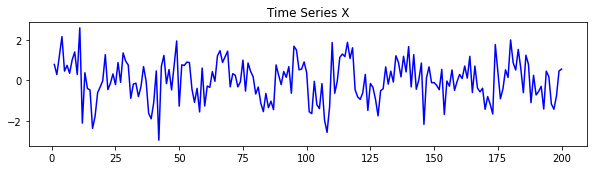

In [30]:
t = np.linspace(1, N, N)
X = np.sin(2*np.pi*t/T);
noise = stdnoise * np.random.randn(len(X))
X = X + noise
X = X - np.mean(X);            # remove mean value
X = X/np.std(X);             # normalize to standard deviation 1

plt.subplot(2,1,1)
plt.title("Time Series X")
plt.plot(t, X, 'b-');

### Calculate Covariance Matrix (Toepliz approach)

### Calculate covariance matrix (trajectory approach)

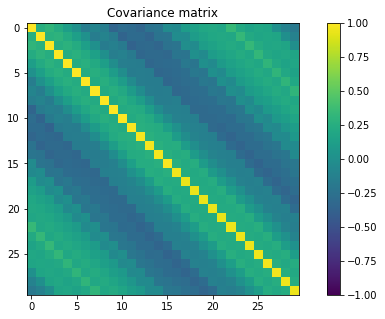

In [31]:
Y = np.zeros((N-M+1,M));
for m in range(M):
    Y[:, m] = X[m:N-M+m+1];
Cemb = Y.T @ Y / (N-M+1);


fig, ax = plt.subplots()
plt.title('Covariance matrix');
plt.imshow(Cemb);
#axis square
plt.clim(-1, 1); # Set Color limit of colorbar
plt.colorbar(); # Add colorbar
plt.show()

### Choose covariance estimation

In [32]:
# C = Ctoep;
C = Cemb;

### Calculate Eigenvalues and Eigenvectors

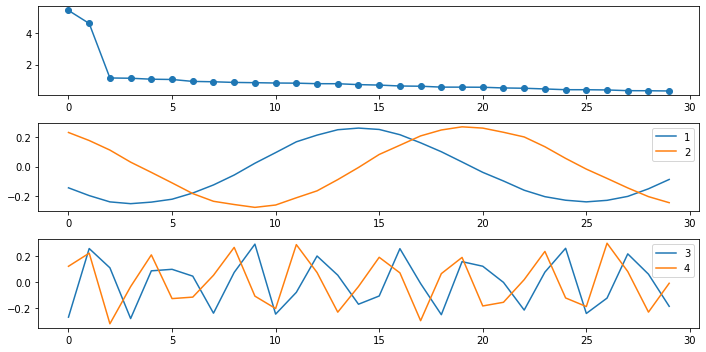

In [38]:
LAMBDA,RHO = np.linalg.eig(C);
SI = np.flip(np.argsort(LAMBDA))
LAMBDA = LAMBDA[SI]
RHO = RHO[:, SI];


plt.title('Eigenvectors RHO and eigenvalues LAMBDA')
plt.subplot(3,1,1);
plt.plot(LAMBDA,'o-');
plt.subplot(3,1,2);
plt.plot(RHO[:,0], '-', label='1');
plt.plot(RHO[:,1], '-', label='2');
plt.legend();
plt.subplot(3,1,3);
plt.plot(RHO[:,2], '-', label='3');
plt.plot(RHO[:,3], '-', label='4');
plt.legend();
plt.tight_layout()

### Create Principle Components (PC)

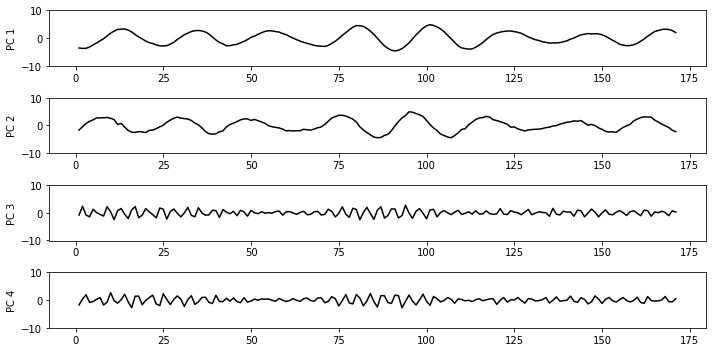

In [39]:
PC = Y @ RHO

plt.title('Principal components PCs')
for m in range(4):
    plt.subplot(4,1,m + 1);
    plt.plot(t[0:N-M+1],PC[:,m],'k-');
    plt.ylabel(f'PC {m + 1}');
    plt.ylim(-10, 10);
plt.tight_layout()

### Calculate Reconstructed Components (RC)

(200, 30)


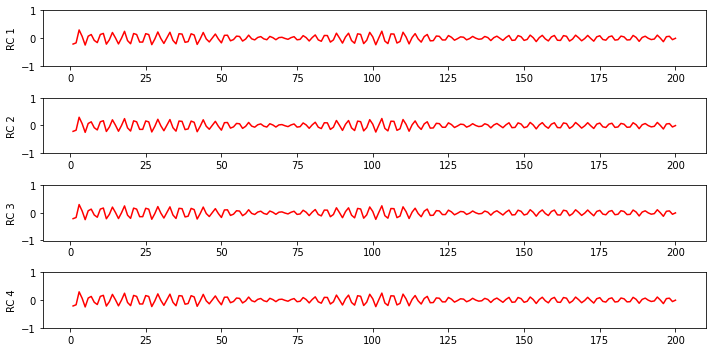

In [64]:
RC = np.zeros((N,M))
b = np.array([PC[:,m]])
c = np.array([RHO[:,m]])
for m in range(M):
    buf = b.T @ c # invert projection
    buf = np.flipud(buf); # try changing to fliplr
    for n in range(1,N + 1): # anti-diagonal averaging
        RC[n-1,m] = np.mean(np.diag(buf,-(N-M+1)+n));

print(np.shape(RC))

plt.title('Reconstructed components RCs')
for m in range(4):
    plt.subplot(4,1,m + 1);
    plt.plot(t,RC[:,m],'r-');
    plt.ylabel(f'RC {m + 1}');
    plt.ylim(-1,1);
plt.tight_layout();

### Compare reconstruction and original time series

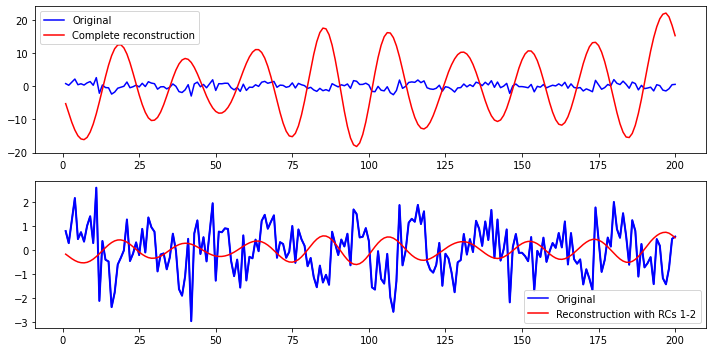

In [62]:
plt.title('Original time series X and reconstruction RC')
plt.subplot(2,1,1)
plt.plot(t,X,'b-',label = 'Original');
plt.plot(t,np.sum(RC[:,:],1),'r-', label = 'Complete reconstruction');
plt.legend();

plt.subplot(2,1,2)
plt.plot(t,X,'b',linewidth = 2);
plt.plot(t,X,'b-',label = 'Original');
plt.plot(t,np.sum(RC[:,1:2],1),'r-', label = 'Reconstruction with RCs 1-2');
plt.legend();
plt.tight_layout()